En esta notebook:



*   ETM para doc2vec
*  vMF para doc2vec


### ETM para Doc2Vec
VAMOS a:

implementar un modelo ETM (Embedded Topic Model) usando Doc2Vec en cada texto de la columna text del DataFrame df_newsgroups y guardar el resultado como una nueva columna, sigue estos pasos:

Entrenar Doc2Vec: Primero, entrena un modelo Doc2Vec con los textos en df_newsgroups para obtener los embeddings de los documentos.

Preparar el ETM: Usa un modelo ETM con los embeddings obtenidos de Doc2Vec. Un ETM normalmente necesita representaciones de los textos en un espacio de baja dimensionalidad y una lista de palabras para modelar los temas. Usamos los topicos originales para modelar los temas

Implementar el ETM: usamos una librería como PyTorch para crear y entrenar el ETM. Define una arquitectura que tome los embeddings de Doc2Vec como entrada y genere los temas.

Guardar el Output: Luego de entrenar el ETM, aplicamos el modelo a cada documento para generar su asignación de tema. Guarda este output en una nueva columna, por ejemplo, etm_topic.

Calculamos el porcentaje de documentos por tópico que fueron asignados correctamente, las correpondientes matrices de confusión y la coherencia c_v.

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

# Descargar el conjunto de datos 20 Newsgroups
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Crear un DataFrame a partir de los datos de newsgroups, incluyendo las etiquetas y los nombres de los tópicos
df_newsgroups = pd.DataFrame({
    'text': newsgroups_data.data,  # Los textos de los documentos
    'label': newsgroups_data.target,  # Las etiquetas de los documentos
    'topic': [newsgroups_data.target_names[label] for label in newsgroups_data.target]  # Los nombres de los tópicos
})

# Guardar el DataFrame en un archivo CSV
df_newsgroups.to_csv('20newsgroups_data_with_topics.csv', index=False)

# Mostrar el DataFrame creado
df_newsgroups.head()  # Mostrar las primeras filas del DataFrame


,text,label,topic
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware


In [ ]:
!pip install -q scikit-learn==1.1.0 octis==1.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 52.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.25.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.0 which is incompatible.
mlxtend 0.23.2 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.0 which is incompatible.


In [ ]:
!pip install torch torchvision
!pip install octis
!pip install transformers

In [ ]:
!pip install -q torch torchvision octis gensim

VAMOS a hacer:

implementar un modelo ETM (Embedded Topic Model) usando Doc2Vec en cada texto de la columna text del DataFrame df_newsgroups y guardar el resultado como una nueva columna, sigue estos pasos:

Entrenar Doc2Vec: Primero, entrena un modelo Doc2Vec con los textos en df_newsgroups para obtener los embeddings de los documentos.

Preparar el ETM: Usa un modelo ETM con los embeddings obtenidos de Doc2Vec. Un ETM normalmente necesita representaciones de los textos en un espacio de baja dimensionalidad y una lista de palabras para modelar los temas. Usamos los topicos originales para modelar los temas

Implementar el ETM: Puedes usar una librería como PyTorch para crear y entrenar el ETM. Define una arquitectura que tome los embeddings de Doc2Vec como entrada y genere los temas.

Guardar el Output: Luego de entrenar el ETM, puedes aplicar el modelo a cada documento para generar su asignación de tema. Guarda este output en una nueva columna, por ejemplo, etm_topic.

In [ ]:
#Hacemos los embeddigs Doc2Vec de los textos y aplicamos ETM
import pandas as pd
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.preprocessing import LabelEncoder
import torch

# Paso 1: Preparar documentos para Doc2Vec
documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(df_newsgroups['text'])]
doc2vec_model = Doc2Vec(documents, vector_size=50, window=2, min_count=1, workers=4)

# Paso 2: Obtener los embeddings de Doc2Vec para cada documento
df_newsgroups['doc2vec_vector'] = df_newsgroups['text'].apply(lambda x: doc2vec_model.infer_vector(x.split()))

# Paso 3: Codificar los tópicos en formato numérico
label_encoder = LabelEncoder()
df_newsgroups['topic_encoded'] = label_encoder.fit_transform(df_newsgroups['topic'])

# Paso 4: Implementar el ETM usando PyTorch
# Definir el modelo ETM basado en los embeddings y tópicos
class ETM(torch.nn.Module):
    def __init__(self, input_dim, num_topics):
        super(ETM, self).__init__()
        self.fc = torch.nn.Linear(input_dim, num_topics)

    def forward(self, x):
        return torch.nn.functional.softmax(self.fc(x), dim=1)

num_topics = len(df_newsgroups['topic'].unique())
etm_model = ETM(input_dim=50, num_topics=num_topics)

# Convertir los embeddings a tensores para el entrenamiento
doc_embeddings = torch.tensor(df_newsgroups['doc2vec_vector'].tolist(), dtype=torch.float)
topic_labels = torch.tensor(df_newsgroups['topic_encoded'].values, dtype=torch.long)

# Configuración de optimizador y función de pérdida
optimizer = torch.optim.Adam(etm_model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Entrenamiento básico del ETM
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = etm_model(doc_embeddings)
    loss = criterion(outputs, topic_labels)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}")

# Paso 5: Asignar temas generados a cada documento
with torch.no_grad():
    df_newsgroups['etm_topic'] = etm_model(doc_embeddings).argmax(dim=1).numpy()

# Decodificar los temas generados a palabras de la columna 'topic'
df_newsgroups['etm_topic'] = label_encoder.inverse_transform(df_newsgroups['etm_topic'])


<ipython-input-5-36683dbb2ae4>:32: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  doc_embeddings = torch.tensor(df_newsgroups['doc2vec_vector'].tolist(), dtype=torch.float)


Epoch [0/100], Loss: 2.9936
Epoch [10/100], Loss: 2.9542
Epoch [20/100], Loss: 2.9162
Epoch [30/100], Loss: 2.8859
Epoch [40/100], Loss: 2.8616
Epoch [50/100], Loss: 2.8409
Epoch [60/100], Loss: 2.8242
Epoch [70/100], Loss: 2.8103
Epoch [80/100], Loss: 2.7986
Epoch [90/100], Loss: 2.7887


In [ ]:
df_newsgroups[:10]

,text,label,topic,doc2vec_vector,topic_encoded,etm_topic
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey,"[0.04451659, -0.3918168, -0.08804213, 0.302433...",10,rec.sport.hockey
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware,"[-0.25625607, 0.06305929, -0.09897126, -0.2720...",3,misc.forsale
2,\n\n\n\n\tFinally you said what you dream abou...,17,talk.politics.mideast,"[0.73294646, 0.11802126, 0.76206255, 0.7220447...",17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware,"[-0.28428552, 0.0920955, 0.20439501, -0.459562...",3,sci.electronics
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware,"[-0.27826995, 0.3844647, -0.3973016, -0.246294...",4,comp.sys.ibm.pc.hardware
5,\n\nBack in high school I worked as a lab assi...,12,sci.electronics,"[-0.11902274, 0.42722598, -0.33126727, 0.18322...",12,misc.forsale
6,\n\nAE is in Dallas...try 214/241-6060 or 214/...,4,comp.sys.mac.hardware,"[-0.10214916, 0.06528482, -0.046819966, -0.076...",4,rec.sport.hockey
7,"\n[stuff deleted]\n\nOk, here's the solution t...",10,rec.sport.hockey,"[0.005153087, 0.015400281, -0.05202295, -0.451...",10,rec.sport.baseball
8,"\n\n\nYeah, it's the second one. And I believ...",10,rec.sport.hockey,"[0.06869095, 0.031000894, -0.13250177, -0.0797...",10,rec.sport.baseball
9,\nIf a Christian means someone who believes in...,19,talk.religion.misc,"[-0.18385947, 0.24828567, -0.21934405, -0.0298...",19,soc.religion.christian


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import gensim

# Preprocess text into tokens for coherence calculation
df_newsgroups['tokens'] = df_newsgroups['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

# Group tokens by the assigned ETM topic, and flatten each group to get a single list of words per topic
topic_words = df_newsgroups.groupby('etm_topic')['tokens'].apply(lambda docs: [word for tokens in docs for word in tokens]).tolist()

# Create a Gensim dictionary from all tokens
dictionary = Dictionary(df_newsgroups['tokens'])

# Compute coherence score using c_v (you can change this to u_mass, c_uci, or c_npmi if preferred)
coherence_model = CoherenceModel(topics=topic_words, texts=df_newsgroups['tokens'].tolist(),
                                 dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Coherence score for ETM topics: {coherence_score:.4f}")

Coherence score for ETM topics: 0.3624


In [ ]:
# Contar coincidencias entre 'topic' y 'etm_topic'
coincidencias = (df_newsgroups['topic'] == df_newsgroups['etm_topic']).sum()

# Mostrar el número de coincidencias
print(f"El número de documentos en los que coinciden 'topic' y 'etm_topic' es: {coincidencias}")


El número de documentos en los que coinciden 'topic' y 'etm_topic' es: 6963


In [ ]:
num_filas = df_newsgroups.shape[0]
print(f"El número de filas en el DataFrame es: {num_filas}")


El número de filas en el DataFrame es: 18846


In [ ]:
num_filas = 18846
coincidencias = 6963

porcentaje_coincidencias = (coincidencias / num_filas) * 100
print(f"El porcentaje de coincidencias es: {porcentaje_coincidencias:.2f}%")


El porcentaje de coincidencias es: 36.95%


In [ ]:
!pip uninstall scikit-learn -y




Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2


In [ ]:
!pip cache purge


Files removed: 45


In [ ]:
!pip install scikit-learn==1.2.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 47.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
octis 1.14.0 requires scikit-learn==1.1.0, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
import pandas as pd

# Crear una tabla de contingencia (confusión) con pandas
matriz_confusion = pd.crosstab(df_newsgroups['topic'], df_newsgroups['etm_topic'], rownames=['Actual'], colnames=['Predicted'])

# Mostrar la matriz de confusión
print(matriz_confusion)



Predicted                 comp.graphics  comp.os.ms-windows.misc  \
Actual                                                             
alt.atheism                           2                        0   
comp.graphics                       250                        0   
comp.os.ms-windows.misc              40                       17   
comp.sys.ibm.pc.hardware             18                        0   
comp.sys.mac.hardware                12                        0   
comp.windows.x                       42                        1   
misc.forsale                          7                        0   
rec.autos                             7                        0   
rec.motorcycles                       1                        0   
rec.sport.baseball                    3                        0   
rec.sport.hockey                      2                        0   
sci.crypt                            18                        0   
sci.electronics                      71         

In [ ]:
!pip install seaborn


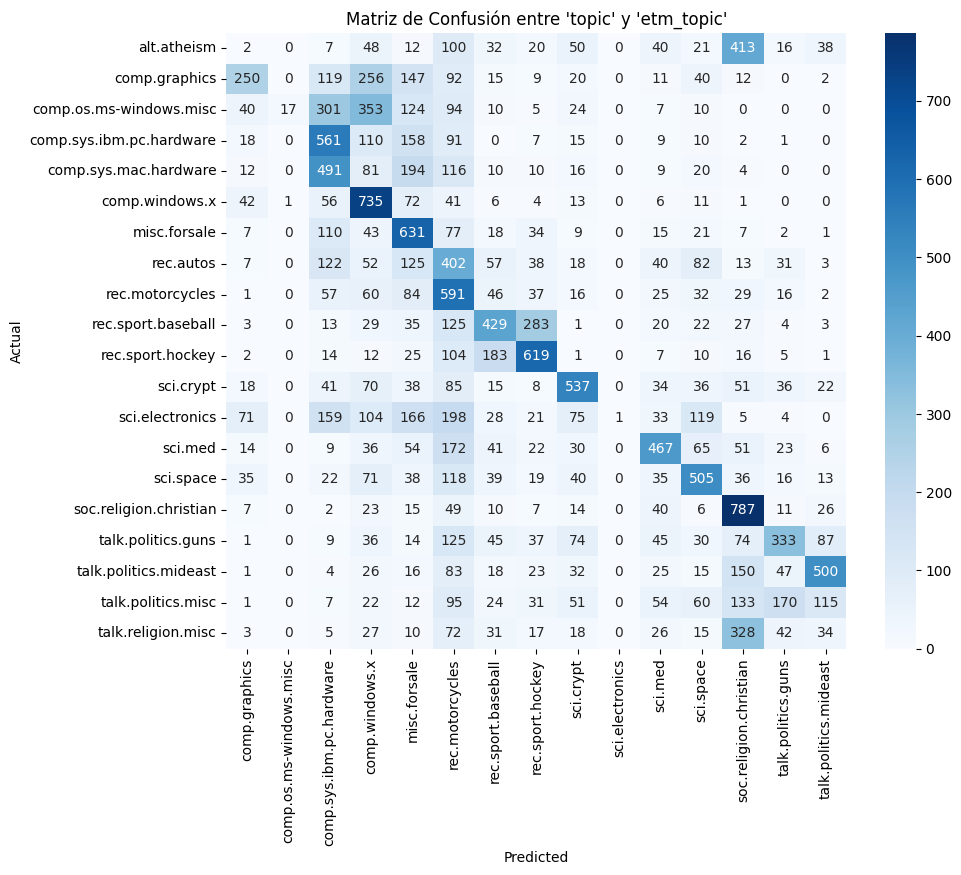

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la tabla de contingencia como matriz de confusión
matriz_confusion = pd.crosstab(df_newsgroups['topic'], df_newsgroups['etm_topic'], rownames=['Actual'], colnames=['Predicted'])

# Plotear la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Matriz de Confusión entre 'topic' y 'etm_topic'")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


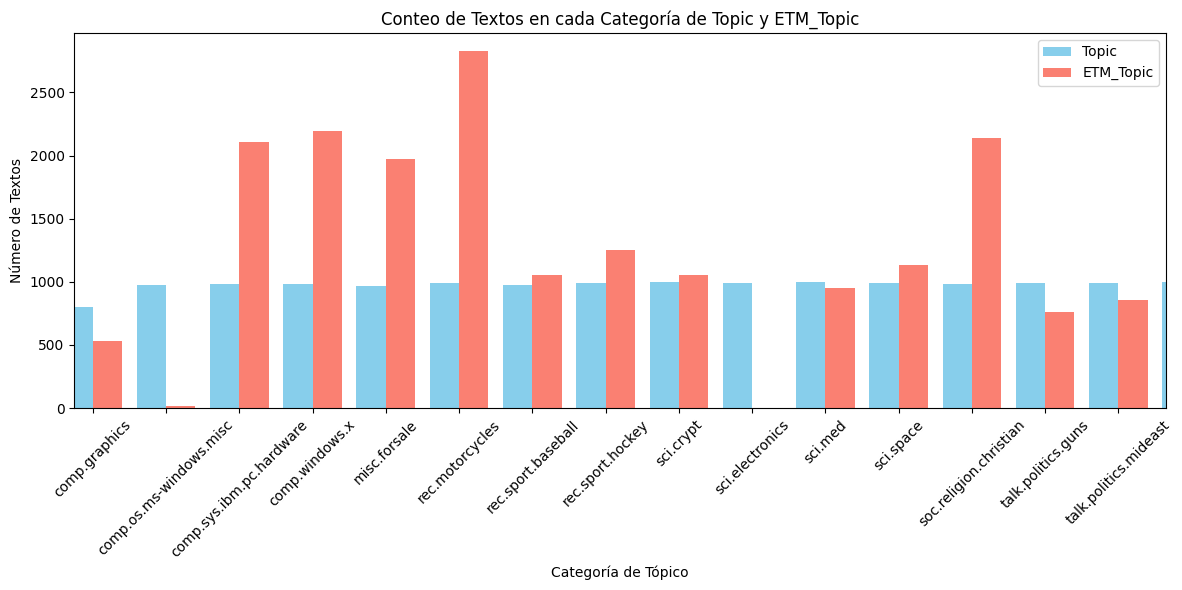

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de textos en cada categoría de 'topic' y 'etm_topic'
topic_counts = df_newsgroups['topic'].value_counts().sort_index()
etm_topic_counts = df_newsgroups['etm_topic'].value_counts().sort_index()

# Crear un gráfico de barras para las dos series de conteo
fig, ax = plt.subplots(figsize=(12, 6))
topic_counts.plot(kind='bar', color='skyblue', ax=ax, width=0.4, position=1, label='Topic')
etm_topic_counts.plot(kind='bar', color='salmon', ax=ax, width=0.4, position=0, label='ETM_Topic')

# Configurar etiquetas y título
plt.title("Conteo de Textos en cada Categoría de Topic y ETM_Topic")
plt.xlabel("Categoría de Tópico")
plt.ylabel("Número de Textos")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### vMF con Doc2vec

VAMOS a:

implementar un modelo vMF usando Doc2Vec en cada texto de la columna text del DataFrame df_newsgroups y guardar el resultado como una nueva columna. Usamos los topicos originales para modelar los temas con vMF.

Calculamos el porcentaje de documentos por tópico que fueron asignados correctamente, matriz de confusón y la coherencia c_v.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

# Preparar los documentos para Doc2Vec
documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(df_newsgroups['text'])]

# Entrenar el modelo Doc2Vec para obtener embeddings
doc2vec_model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=4)

# Obtener embeddings de cada documento y normalizar en una esfera
df_newsgroups['embedding'] = df_newsgroups['text'].apply(lambda x: doc2vec_model.infer_vector(x.split()))
df_newsgroups['embedding'] = df_newsgroups['embedding'].apply(lambda x: x / np.linalg.norm(x))



In [ ]:
# la distribución von Mises-Fisher
import numpy as np
import pandas as pd

# Paso 1: Preparar los embeddings (suponiendo que ya tienes embeddings generados en la columna 'embedding')
# Normalizar los embeddings para que estén en una esfera
df_newsgroups['embedding'] = df_newsgroups['embedding'].apply(lambda x: x / np.linalg.norm(x))

# Paso 2: Calcular los centroides basados en los tópicos en 'topic'
unique_topics = df_newsgroups['topic'].unique()
centroides_temas = {}

for topic in unique_topics:
    # Obtener los embeddings de los documentos para el tema actual
    embeddings_tema = np.stack(df_newsgroups[df_newsgroups['topic'] == topic]['embedding'].values)

    # Calcular el centroide normalizado para el tema
    centroide = np.mean(embeddings_tema, axis=0)
    centroide = centroide / np.linalg.norm(centroide)  # Normalizar el centroide
    centroides_temas[topic] = centroide

# Paso 3: Definir la función von Mises-Fisher
def von_mises_fisher_distribution(kappa, mu, x):
    """
    Implementación de una distribución von Mises-Fisher en una esfera.
    kappa: concentración
    mu: centro del tema (vector unitario)
    x: vector de texto (también unitario)
    """
    d = len(mu)  # Dimensión del espacio
    coef = kappa ** (d / 2 - 1) / ((2 * np.pi) ** (d / 2) * np.exp(kappa))
    return coef * np.exp(kappa * np.dot(mu, x))

# Paso 4: Asignación de temas a cada documento usando la distribución von Mises-Fisher y transporte óptimo
kappa = 10  # Ajusta el parámetro de concentración según sea necesario

# Crear una lista para almacenar el tema asignado
asignacion_temas = []

for idx, row in df_newsgroups.iterrows():
    # Calcular las probabilidades de cada tema para el documento actual
    probabilidades_tema = {
        topic: von_mises_fisher_distribution(kappa, mu, row['embedding']) for topic, mu in centroides_temas.items()
    }

    # Asignar el tema con la mayor probabilidad
    tema_asignado = max(probabilidades_tema, key=probabilidades_tema.get)
    asignacion_temas.append(tema_asignado)

# Agregar la asignación de temas al DataFrame
df_newsgroups['assigned_topic'] = asignacion_temas

# Mostrar los primeros resultados
print(df_newsgroups[['text', 'topic', 'assigned_topic']].head())



                                                text  \
0  \n\nI am sure some bashers of Pens fans are pr...   
1  My brother is in the market for a high-perform...   
2  \n\n\n\n\tFinally you said what you dream abou...   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...   
4  1)    I have an old Jasmine drive which I cann...   

                      topic            assigned_topic  
0          rec.sport.hockey          rec.sport.hockey  
1  comp.sys.ibm.pc.hardware              misc.forsale  
2     talk.politics.mideast     talk.politics.mideast  
3  comp.sys.ibm.pc.hardware  comp.sys.ibm.pc.hardware  
4     comp.sys.mac.hardware  comp.sys.ibm.pc.hardware  


In [ ]:
# Convertir cada embedding en df_newsgroups['embedding'] a np.array de tipo float si no lo es ya
df_newsgroups['embedding'] = df_newsgroups['embedding'].apply(lambda x: np.array(x, dtype=float) if not isinstance(x, np.ndarray) else x)

# Asegurar que cada centroide en centroides_temas sea un np.array de tipo float
centroides_temas = {topic: np.array(mu, dtype=float) for topic, mu in centroides_temas.items()}


In [ ]:
# Crear una lista para almacenar el tema asignado a cada documento
asignacion_temas = []

# Para cada documento, calcular el tema más similar y asignarlo
for embedding in df_newsgroups['embedding']:
    # Calcular las similitudes con cada centroide de tema
    similitudes = {topic: np.dot(embedding, mu) for topic, mu in centroides_temas.items()}

    # Seleccionar el tema con la mayor similitud
    tema_asignado = max(similitudes, key=similitudes.get)
    asignacion_temas.append(tema_asignado)

# Asignar la lista de temas a la columna 'assigned_topic'
df_newsgroups['assigned_topic'] = asignacion_temas

# Mostrar los primeros resultados
print(df_newsgroups[['text', 'topic', 'assigned_topic']].head())




                                                text  \
0  \n\nI am sure some bashers of Pens fans are pr...   
1  My brother is in the market for a high-perform...   
2  \n\n\n\n\tFinally you said what you dream abou...   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...   
4  1)    I have an old Jasmine drive which I cann...   

                      topic            assigned_topic  
0          rec.sport.hockey          rec.sport.hockey  
1  comp.sys.ibm.pc.hardware              misc.forsale  
2     talk.politics.mideast     talk.politics.mideast  
3  comp.sys.ibm.pc.hardware  comp.sys.ibm.pc.hardware  
4     comp.sys.mac.hardware  comp.sys.ibm.pc.hardware  


In [ ]:
# Ver los primeros resultados
print(df_newsgroups[['text', 'topic', 'assigned_topic']].head())


                                                text  \
0  \n\nI am sure some bashers of Pens fans are pr...   
1  My brother is in the market for a high-perform...   
2  \n\n\n\n\tFinally you said what you dream abou...   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...   
4  1)    I have an old Jasmine drive which I cann...   

                      topic            assigned_topic  
0          rec.sport.hockey          rec.sport.hockey  
1  comp.sys.ibm.pc.hardware              misc.forsale  
2     talk.politics.mideast     talk.politics.mideast  
3  comp.sys.ibm.pc.hardware  comp.sys.ibm.pc.hardware  
4     comp.sys.mac.hardware  comp.sys.ibm.pc.hardware  


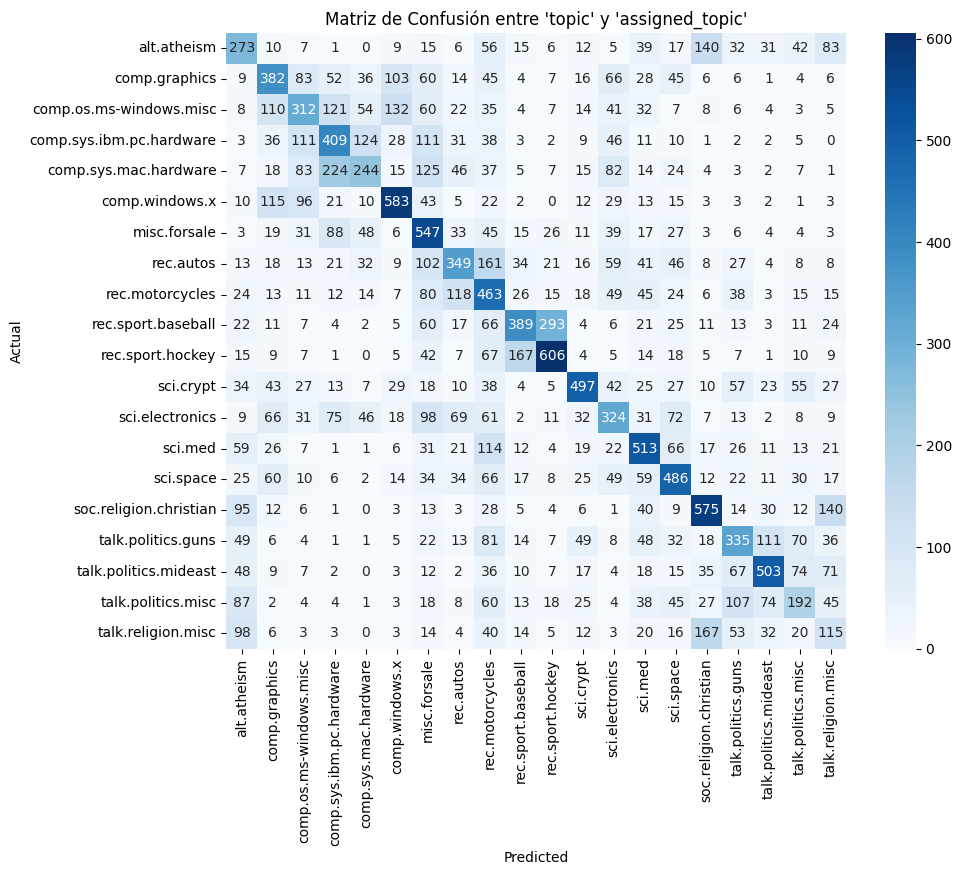

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la tabla de contingencia como matriz de confusión
matriz_confusion = pd.crosstab(df_newsgroups['topic'], df_newsgroups['assigned_topic'], rownames=['Actual'], colnames=['Predicted'])

# Plotear la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Matriz de Confusión entre 'topic' y 'assigned_topic'")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


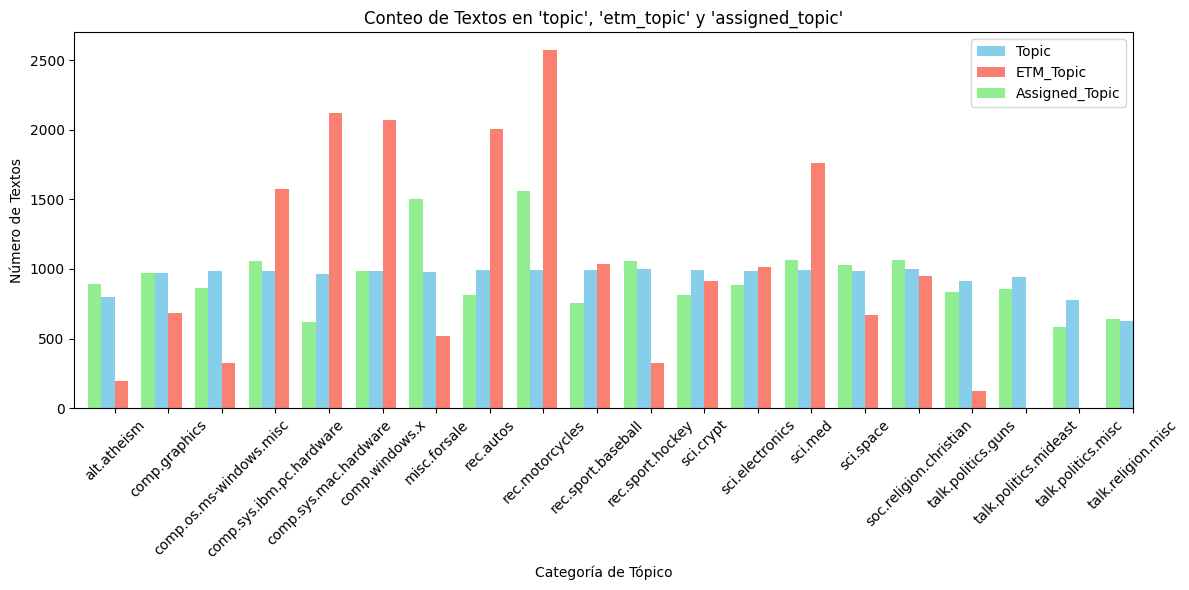

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de textos en cada categoría de 'topic', 'etm_topic' y 'assigned_topic'
topic_counts = df_newsgroups['topic'].value_counts().sort_index()
etm_topic_counts = df_newsgroups['etm_topic'].value_counts().sort_index()
assigned_topic_counts = df_newsgroups['assigned_topic'].value_counts().sort_index()

# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

# Plotear los conteos de 'topic', 'etm_topic' y 'assigned_topic'
topic_counts.plot(kind='bar', color='skyblue', ax=ax, width=0.25, position=1, label='Topic')
etm_topic_counts.plot(kind='bar', color='salmon', ax=ax, width=0.25, position=0, label='ETM_Topic')
assigned_topic_counts.plot(kind='bar', color='lightgreen', ax=ax, width=0.25, position=2, label='Assigned_Topic')

# Configurar etiquetas y título
plt.title("Conteo de Textos en 'topic', 'etm_topic' y 'assigned_topic'")
plt.xlabel("Categoría de Tópico")
plt.ylabel("Número de Textos")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
# Contar coincidencias exactas entre 'topic' y 'assigned_topic'
coincidencias = (df_newsgroups['topic'] == df_newsgroups['assigned_topic']).sum()

# Calcular la accuracy dividiendo las coincidencias por el total de documentos
accuracy = coincidencias / len(df_newsgroups)

# Mostrar el resultado
print(f"La accuracy es: {accuracy:.4f}")


La accuracy es: 0.4296


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import gensim

# Preprocess text into tokens for coherence calculation
df_newsgroups['tokens'] = df_newsgroups['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

# Group tokens by the assigned ETM topic, and flatten each group to get a single list of words per topic
topic_words = df_newsgroups.groupby('assigned_topic')['tokens'].apply(lambda docs: [word for tokens in docs for word in tokens]).tolist()

# Create a Gensim dictionary from all tokens
dictionary = Dictionary(df_newsgroups['tokens'])

# Compute coherence score using c_v (you can change this to u_mass, c_uci, or c_npmi if preferred)
coherence_model = CoherenceModel(topics=topic_words, texts=df_newsgroups['tokens'].tolist(),
                                 dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Coherence score for ETM topics: {coherence_score:.4f}")

Coherence score for ETM topics: 0.3737
